In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv('2015.csv')

In [47]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [48]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [49]:
#boslukları _ ile doldurduk.
df.columns=df.columns.str.replace(' ','_')

In [50]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [51]:
#158 satır 12 sütün
df.shape

(158, 12)

In [52]:
# data type düzgün
df.dtypes

Country                           object
Region                            object
Happiness_Rank                     int64
Happiness_Score                  float64
Standard_Error                   float64
Economy_(GDP_per_Capita)         float64
Family                           float64
Health_(Life_Expectancy)         float64
Freedom                          float64
Trust_(Government_Corruption)    float64
Generosity                       float64
Dystopia_Residual                float64
dtype: object

In [53]:
# eksik veri yok
df.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

In [54]:
df=df.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption",
                      "Happiness_Rank":"Rank"
                      })

In [55]:
df.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

## TOP 10 HAPPINES COUNTRY

In [56]:
# 158 ülke var
len(df["Country"].unique())

158

<Axes: xlabel='Happiness_Score', ylabel='Country'>

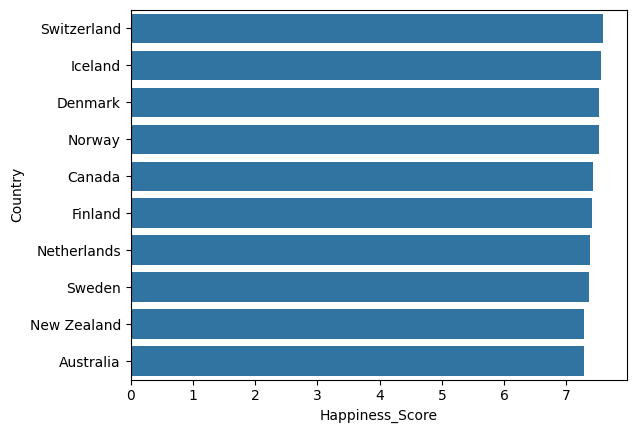

In [57]:
# En mutlu 10 ülke
sns.barplot(y = df["Country"][:10], x = df["Happiness_Score"][:10])

<Axes: xlabel='Happiness_Score', ylabel='Country'>

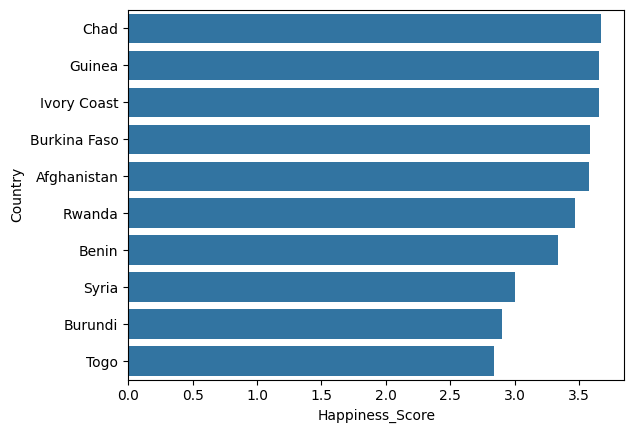

In [58]:
#En mutsuz 10 ülke
sns.barplot(y = df["Country"][-10:], x = df["Happiness_Score"][-10:])

In [59]:
#2015 yılında turkıye 76. sırada
df_turkiye = df[df["Country"]=="Turkey"]

In [60]:
df_turkiye

,Country,Region,Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


<Axes: xlabel='Happiness_Score', ylabel='Country'>

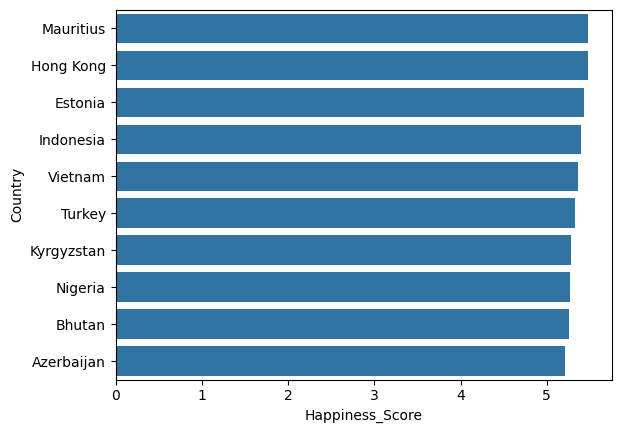

In [61]:
sns.barplot(y = df["Country"][70:80], x = df["Happiness_Score"][70:80])

## DİGER FAKTORLER

In [62]:
df.columns


Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

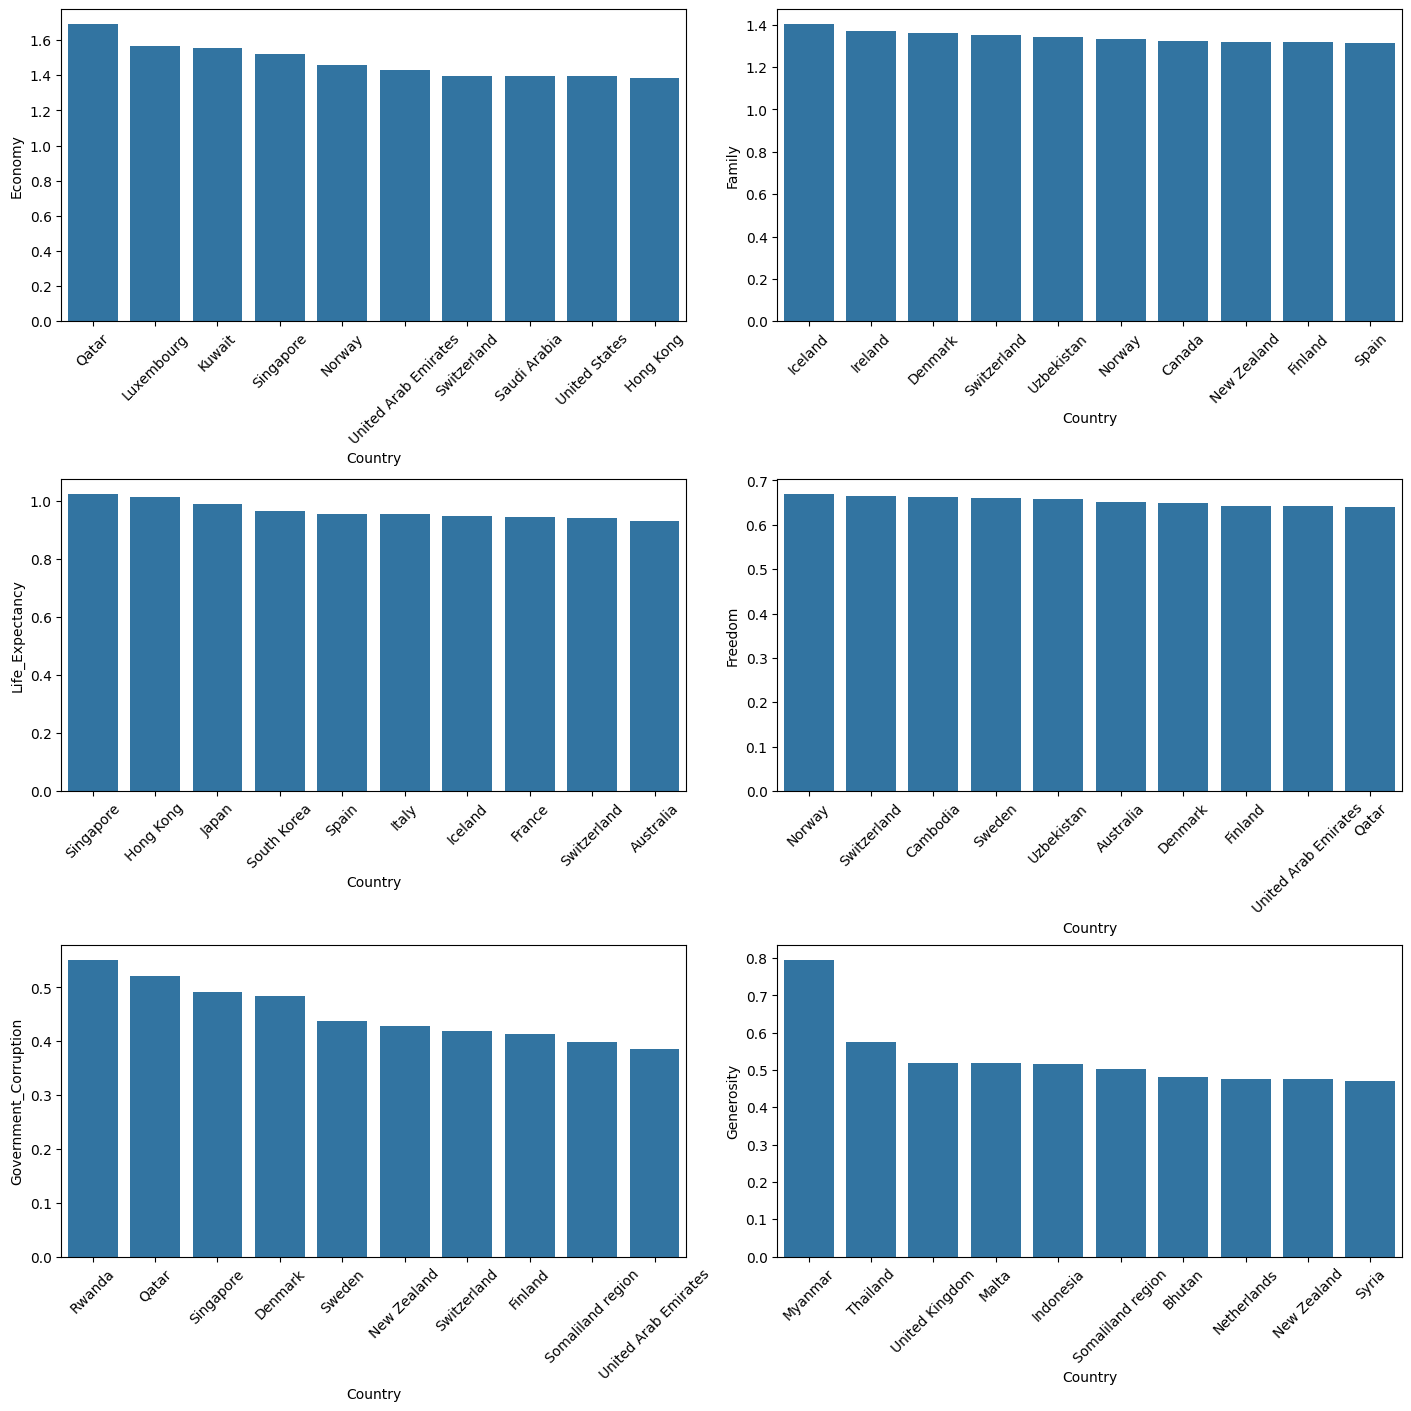

In [63]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = df.sort_values(by = ['Economy'], ascending = False)
sort_eco = sort_eco.head(10)
sort_fa = df.sort_values(by = ['Family'], ascending = False)
sort_fa = sort_fa.head(10)
sort_he = df.sort_values(by = ['Life_Expectancy'], ascending = False)
sort_he = sort_he.head(10)
sort_free = df.sort_values(by = ['Freedom'], ascending = False)
sort_free = sort_free.head(10)
sort_gc = df.sort_values(by = ['Government_Corruption'], ascending = False)
sort_gc = sort_gc.head(10)
sort_genero = df.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(10)

ax=sns.barplot(x="Country", y="Economy", data=sort_eco, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Family", data=sort_fa, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Life_Expectancy", data=sort_he, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Freedom", data=sort_free, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Government_Corruption", data = sort_gc, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

## Dıger Yıllar

In [64]:
df1=pd.read_csv('2016.csv')
df2=pd.read_csv('2017.csv')
df3=pd.read_csv('2018.csv')
df4=pd.read_csv('2019.csv')

In [65]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [66]:
df1.columns=df1.columns.str.replace(' ','_')

In [67]:
df1=df1.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [68]:
df1.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [69]:
df2.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [70]:
df2.columns=df2.columns.str.replace('.','_')

In [71]:
df2.columns=df2.columns.str.replace('__','_')

In [72]:
df2.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_GDP_per_Capita_', 'Family',
       'Health_Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust_Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [73]:
df2=df2.rename(columns={"Economy_GDP_per_Capita_":"Economy","Health_Life_Expectancy_":"Life_Expectancy",
                      "Trust_Government_Corruption_":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [74]:
df2.columns

Index(['Country', 'Rank', 'Happiness_Score', 'Whisker_high', 'Whisker_low',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [75]:
df3.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [76]:
df3.columns=df3.columns.str.replace(' ','_')

In [77]:
df3.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [78]:
df3.head(10)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [79]:
df3=df3.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [80]:
df3.columns

Index(['Rank', 'Country', 'Happiness_Score', 'Economy', 'Social_support',
       'Life_Expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [81]:
df4.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [82]:
df4.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [83]:
df4.columns=df4.columns.str.replace(' ','_')

In [84]:
df4.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [85]:
df4=df4.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [86]:
df4.head(10)

,Rank,Country,Happiness_Score,Economy,Social_support,Life_Expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


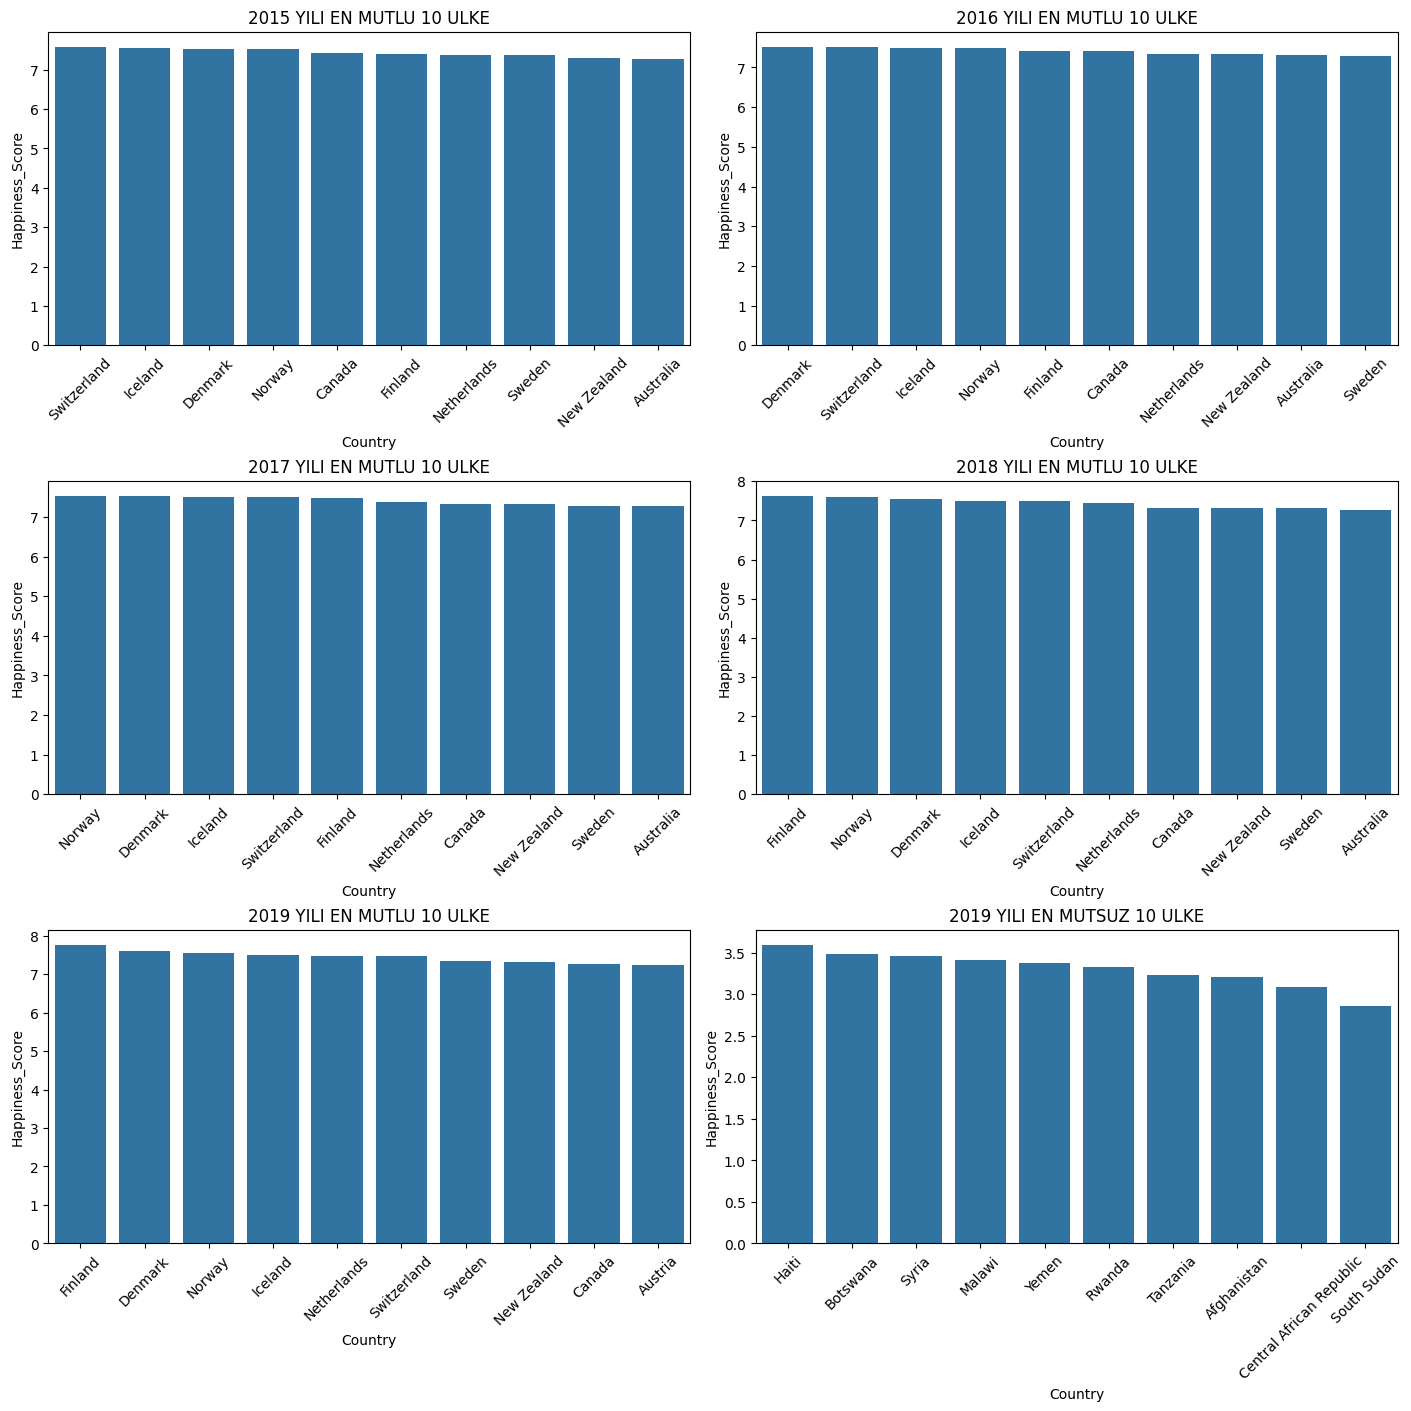

In [87]:
sort_df1 = df1.head(10)
sort_df2 = df2.head(10)
sort_df3 = df3.head(10)
sort_df4 = df4.head(10)
sort_df = df.head(10)
sad_df4 = df4.tail(10)
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_df , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df1, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df2, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df3, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sort_df4, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df4, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)
axs[0, 0].title.set_text('2015 YILI EN MUTLU 10 ULKE')
axs[0, 1].title.set_text('2016 YILI EN MUTLU 10 ULKE')
axs[1, 0].title.set_text('2017 YILI EN MUTLU 10 ULKE')
axs[1, 1].title.set_text('2018 YILI EN MUTLU 10 ULKE')
axs[2, 0].title.set_text('2019 YILI EN MUTLU 10 ULKE')
axs[2, 1].title.set_text('2019 YILI EN MUTSUZ 10 ULKE')